In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hostnames = []
dataset = []
df = None

In [3]:
def set_hostnames(number_of_hosts: int) -> None:
    prefix = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1
    hType = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    country = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    hostnameWithoutCode = []
    
    for i in range(number_of_hosts):
        hostname = random.choice(prefix) + random.choice(hType) + random.choice(country)
        hostnameWithoutCode.append(hostname)
        hostname += str(hostnameWithoutCode.count(hostname)).zfill(3)
        hostnames.append(hostname)

In [4]:
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

In [5]:
def get_enviroment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknow'

In [6]:
def get_country(hostname: str) -> str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    elif hostname[2:5] == 'FRA':
        return 'France'
    else:
        return 'Unknow'

In [7]:
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)
    for hostname in hostnames:
        dataset.append({
            'hostname' : hostname,
            'os' : get_os(hostname),
            'enviroment' : get_enviroment(hostname),
            'country' : get_country(hostname),
            'node' : int(hostname[-3:])
        })
    
    df = pd.DataFrame(dataset)

In [8]:
set_dataframe(1500)

In [9]:
df.head(50)

,hostname,os,enviroment,country,node
0,HSNOR001,HP-UX,Staging,Norway,1
1,LPNOR001,Linux,Production,Norway,1
2,LPDEU001,Linux,Production,Germany,1
3,LTITA001,Linux,Testing,Italy,1
4,LPDEU002,Linux,Production,Germany,2
5,LPESP001,Linux,Production,Spain,1
6,STESP001,Solaris,Testing,Spain,1
7,STESP002,Solaris,Testing,Spain,2
8,ADIRL001,AIX,Development,Ireland,1
9,SPDEU001,Solaris,Production,Germany,1


In [10]:
df.to_csv(
    r'hosts.csv',
    header = True,
    index = False
)

In [11]:
hosts_df = pd.read_csv(
    r'hosts.csv',
    index_col = None,
    encoding = 'ISO-8859-1'
)

hosts_df

,hostname,os,enviroment,country,node
0,HSNOR001,HP-UX,Staging,Norway,1
1,LPNOR001,Linux,Production,Norway,1
2,LPDEU001,Linux,Production,Germany,1
3,LTITA001,Linux,Testing,Italy,1
4,LPDEU002,Linux,Production,Germany,2
...,...,...,...,...,...
1495,APESP020,AIX,Production,Spain,20
1496,SPNOR011,Solaris,Production,Norway,11
1497,LPESP035,Linux,Production,Spain,35
1498,SPFRA012,Solaris,Production,France,12


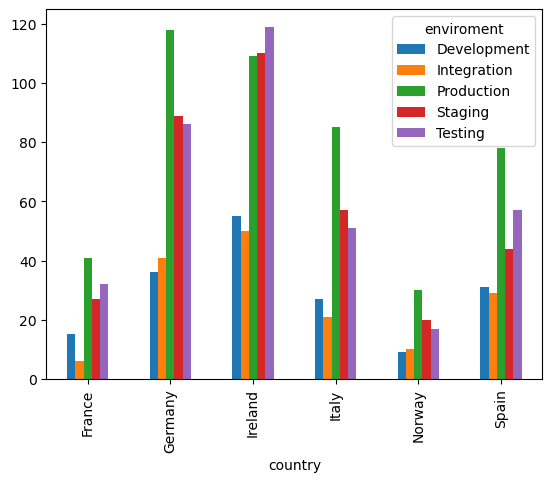

In [12]:
dfAfterFilter = df.groupby(['country'])['enviroment'].value_counts().unstack().plot(kind = 'bar')

plt.show()

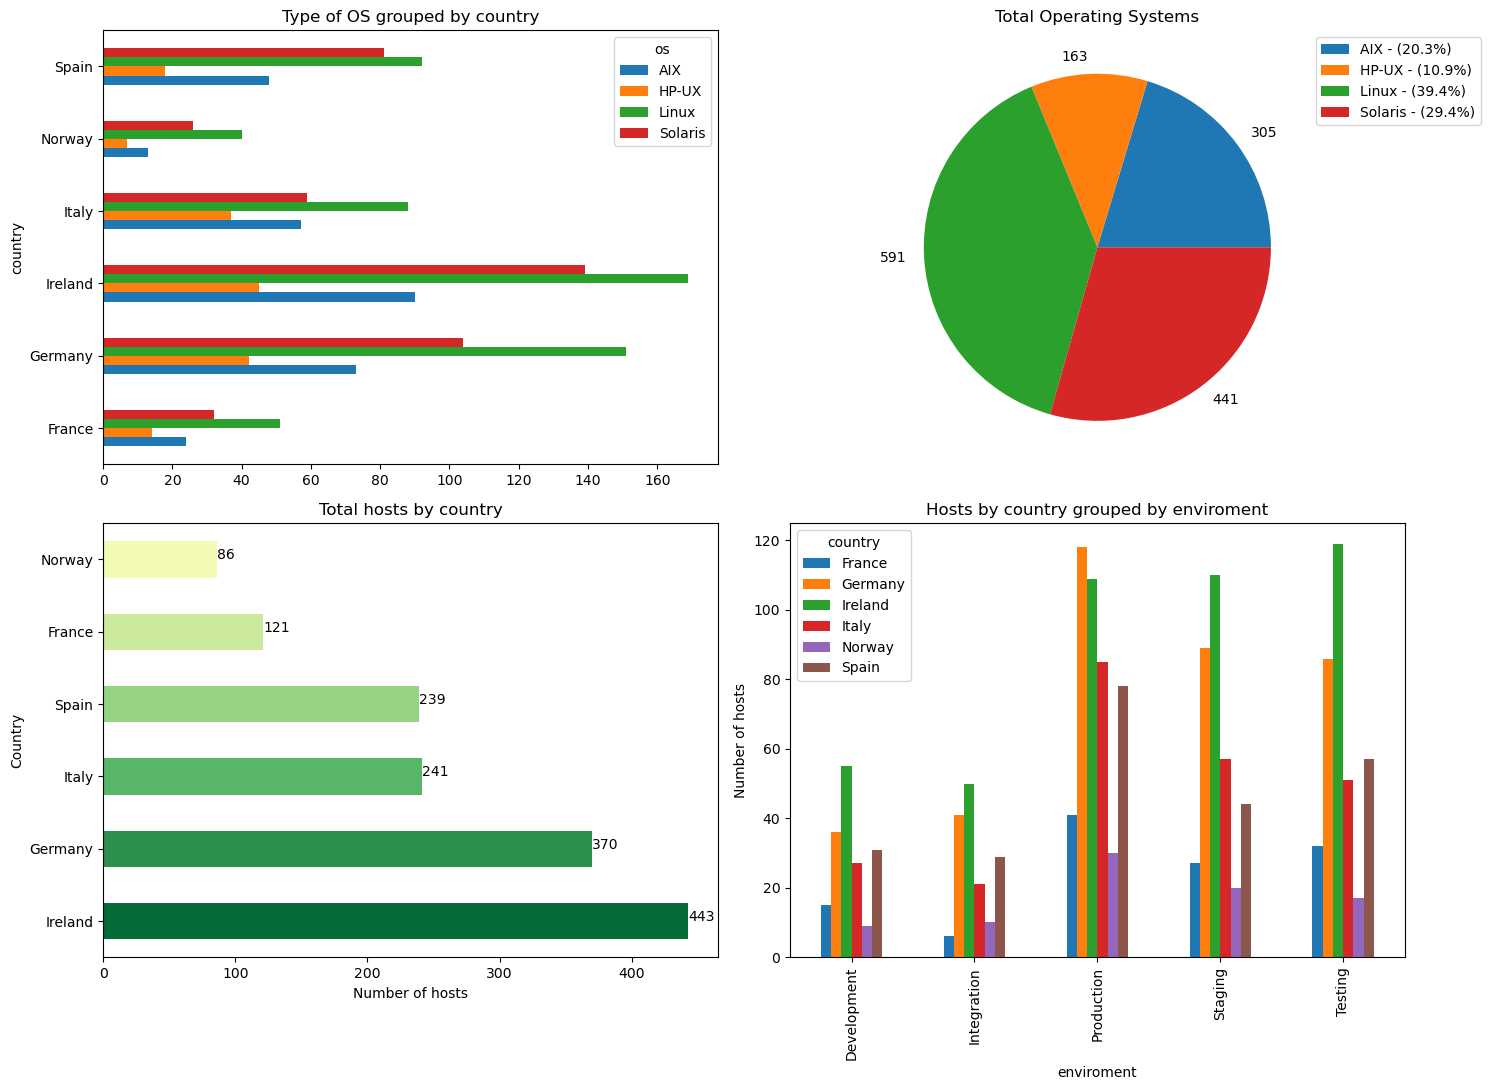

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 11))

#--------------------------------------------------------

# GRAFICO 1
# Añadir un titulo al grafico 1
axs[0, 0].set_title('Type of OS grouped by country')

# Añadir data
grouped = df.groupby(['country', 'os']).size()
unstacked = grouped.unstack()
unstacked.plot(kind='barh', ax=axs[0, 0])
    
# Añadir una leyenda
axs[0, 0].legend()
axs[0, 0].legend(title = "os") 

#--------------------------------------------------------

# GRAFICO 2
# Añadir un titulo al grafico 2
axs[0,1].set_title('Total Operating Systems')

# Añadir data
data = df.groupby(['os']).size()

# Añadir una leyenda
totalOs = len(df)
leyenda= [f"{os} - ({porcent:.1f}%)" for os, porcent in zip(data.index, data*100/totalOs)]

axs[0, 1].pie(data, labels = data)
axs[0, 1].legend(leyenda, loc='upper right', bbox_to_anchor=(1.4, 1))

#--------------------------------------------------------

# GRAFICO 3
import seaborn as sns

# Añadir un titulo al grafico 3
axs[1, 0].set_title('Total hosts by country')

# Añadir data
groupedChart3 = df['country'].value_counts()
groupedChart3.plot(kind='barh', ax=axs[1,0], color=sns.color_palette("YlGn_r"))

# Añadir nombre ejes
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')

# Añadir valores al lado de las barras
for idx, name in enumerate(groupedChart3.index.tolist()): 
    axs[1, 0].text(groupedChart3[idx], idx, groupedChart3[idx])
    
#--------------------------------------------------------

# GRAFICO 4
# Añadir un titulo al grafico 4
axs[1, 1].set_title('Hosts by country grouped by enviroment')

# Añadir data
groupedChart4 = df.groupby(['country', 'enviroment']).size()
unstackedChart4 = groupedChart4.unstack(0)
unstackedChart4.plot(kind='bar', ax=axs[1, 1])
    
# Añadir nombre ejes
axs[1, 1].set_ylabel('Number of hosts')

#--------------------------------------------------------

fig.tight_layout()